In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import acquire
import prepare

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

In [3]:
df = pd.read_csv('cached_all_dfs.csv')

In [4]:
df = prepare.formatting(df)

In [5]:
df.head()

,Unnamed: 0,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,...,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sales_total,month,day
sale_date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,...,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,10.92,January,2
2013-01-01 00:00:00+00:00,211816,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,...,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,218.40,January,2
2013-01-01 00:00:00+00:00,832656,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,...,NaN,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,125.55,January,2
2013-01-01 00:00:00+00:00,213642,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,...,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,453.60,January,2
2013-01-01 00:00:00+00:00,215468,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,...,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,294.00,January,2


In [6]:
# # first I need to set my date column to datetimeindex
# df.sales_total = pd.to_datetime(df.sales_total)
# df = df.set_index('sales_total').sort_index()
# df.dtypes

# Train, Test, Split

In [7]:
# this is an example of a percentage based time-series split
# train_size = .70
# n = df.shape[0]
# test_start_index = round(train_size * n)

# train = df[:test_start_index] # everything up (not including) to the test_start_index
# test = df[test_start_index:] # everything from the test_start_index to the end

# plt.plot(train.index, train.sale_amount)
# plt.plot(test.index, test.sale_amount)

In [8]:
# wanting to see what this is returning
df.shape[0]

913000

In [9]:
df.head()

,Unnamed: 0,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,...,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sales_total,month,day
sale_date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,...,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,10.92,January,2
2013-01-01 00:00:00+00:00,211816,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,...,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,218.40,January,2
2013-01-01 00:00:00+00:00,832656,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,...,NaN,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,125.55,January,2
2013-01-01 00:00:00+00:00,213642,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,...,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,453.60,January,2
2013-01-01 00:00:00+00:00,215468,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,...,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,294.00,January,2


In [10]:
# here I want to resample for better visualizations in the future
df.resample('W').mean()

,Unnamed: 0,item,sale_amount,sale_id,store,store_id,store_zipcode,level_0,index,item_id,item_price,item_upc12,item_upc14,sales_total
sale_date,,,,,,,,,,,,,,
2013-01-06 00:00:00+00:00,455589.5,25.5,30.355667,455590.5,5.5,5.5,78224.8,16.5,9.5,25.5,5.1604,2.384688e+11,2.384688e+11,163.589167
2013-01-13 00:00:00+00:00,455596.0,25.5,29.686286,455597.0,5.5,5.5,78224.8,16.5,9.5,25.5,5.1604,2.384688e+11,2.384688e+11,159.981203
2013-01-20 00:00:00+00:00,455603.0,25.5,29.414286,455604.0,5.5,5.5,78224.8,16.5,9.5,25.5,5.1604,2.384688e+11,2.384688e+11,157.946720
2013-01-27 00:00:00+00:00,455610.0,25.5,29.513714,455611.0,5.5,5.5,78224.8,16.5,9.5,25.5,5.1604,2.384688e+11,2.384688e+11,158.545383
2013-02-03 00:00:00+00:00,455617.0,25.5,31.150571,455618.0,5.5,5.5,78224.8,16.5,9.5,25.5,5.1604,2.384688e+11,2.384688e+11,167.585014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-03 00:00:00+00:00,457381.0,25.5,53.510286,457382.0,5.5,5.5,78224.8,16.5,9.5,25.5,5.1604,2.384688e+11,2.384688e+11,287.470043
2017-12-10 00:00:00+00:00,457388.0,25.5,44.114286,457389.0,5.5,5.5,78224.8,16.5,9.5,25.5,5.1604,2.384688e+11,2.384688e+11,237.313469
2017-12-17 00:00:00+00:00,457395.0,25.5,44.370286,457396.0,5.5,5.5,78224.8,16.5,9.5,25.5,5.1604,2.384688e+11,2.384688e+11,238.363226


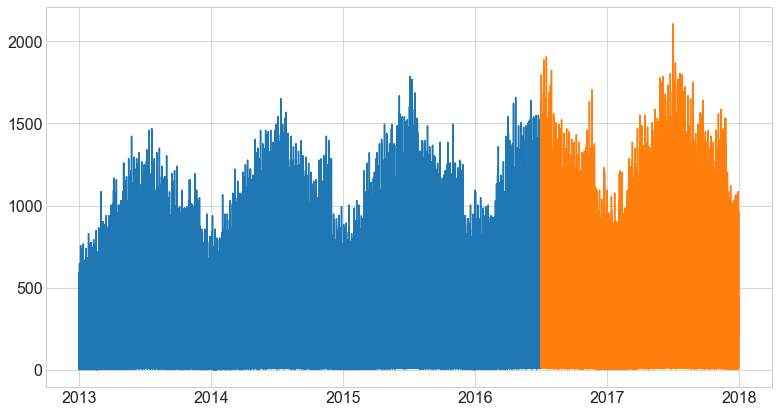

In [25]:
# let's try a percentage based time-series split with store data
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index]# everything up (not including) to the test_start_index
test = df[test_start_index:]# everything from the test_start_index to the end


plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

# Data visualization time

Line plot with time on the x-axis

In [48]:
# need to take this down to the index and sale amount only 
s = train.sales_total.copy()

In [49]:
s.head()

sale_date
2013-01-01 00:00:00+00:00     10.92
2013-01-01 00:00:00+00:00    218.40
2013-01-01 00:00:00+00:00    125.55
2013-01-01 00:00:00+00:00    453.60
2013-01-01 00:00:00+00:00    294.00
Name: sales_total, dtype: float64

<AxesSubplot:xlabel='sale_date'>

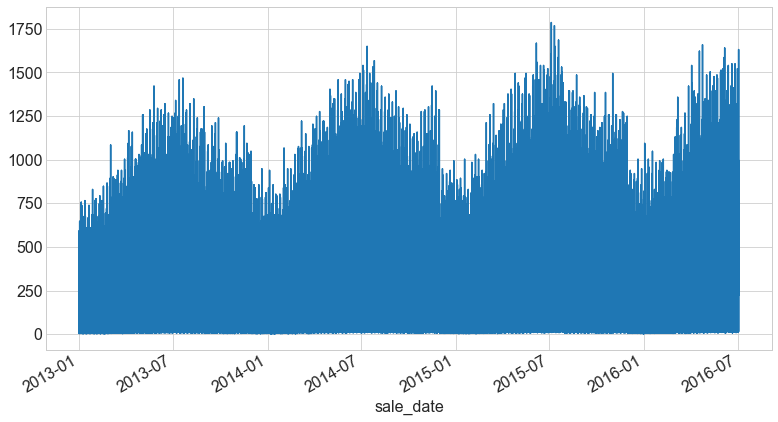

In [50]:
s.plot()

In [51]:
# dont like how the above looks so lets set it to weeks and see how that looks
#s.resample('W').mean().plot() -- can't do this here because I didn't set this to 
#timedatenindex I will go back and fix that now

<AxesSubplot:xlabel='sale_date'>

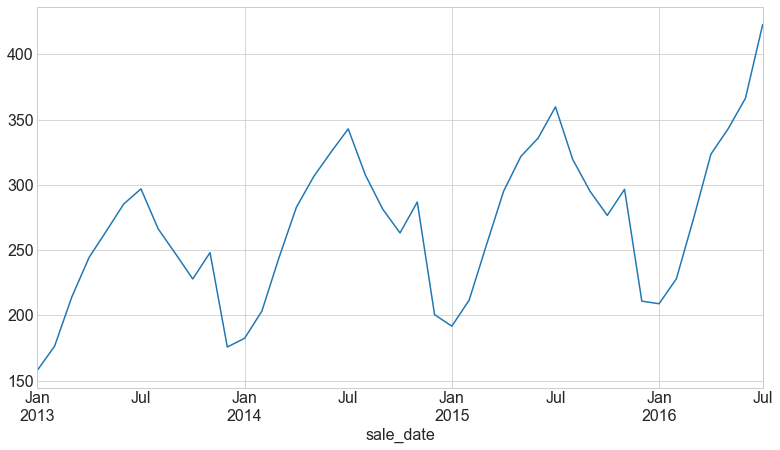

In [52]:
# now let's look at this by month
s.resample('M').mean().plot()

We can combine multiple resampling periods on a single viz:

QUESTION: HOUR COULD HOURLY SALES CONSISTENTLY BE MORE THAN THE DAILY, WEEKLY ETC AVERAGES

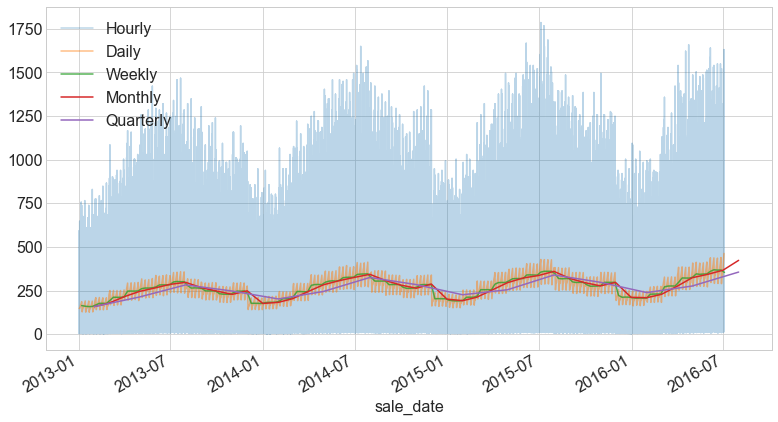

In [53]:
ax = s.plot(alpha=.3, label='Hourly')
s.resample('D').mean().plot(ax=ax, alpha=.5, label='Daily')
s.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
s.resample('M').mean().plot(ax=ax, label='Monthly')
s.resample('3M').mean().plot(ax=ax, label= "Quarterly")
ax.legend()

Treat date components as categorical variables
Aside: Month and Weekday Ordering

In [54]:
s.index.strftime('%m-%b')

Index(['01-Jan', '01-Jan', '01-Jan', '01-Jan', '01-Jan', '01-Jan', '01-Jan',
       '01-Jan', '01-Jan', '01-Jan',
       ...
       '07-Jul', '07-Jul', '07-Jul', '07-Jul', '07-Jul', '07-Jul', '07-Jul',
       '07-Jul', '07-Jul', '07-Jul'],
      dtype='object', name='sale_date', length=639100)

In [55]:
s.head()

sale_date
2013-01-01 00:00:00+00:00     10.92
2013-01-01 00:00:00+00:00    218.40
2013-01-01 00:00:00+00:00    125.55
2013-01-01 00:00:00+00:00    453.60
2013-01-01 00:00:00+00:00    294.00
Name: sales_total, dtype: float64

<AxesSubplot:xlabel='sale_date'>

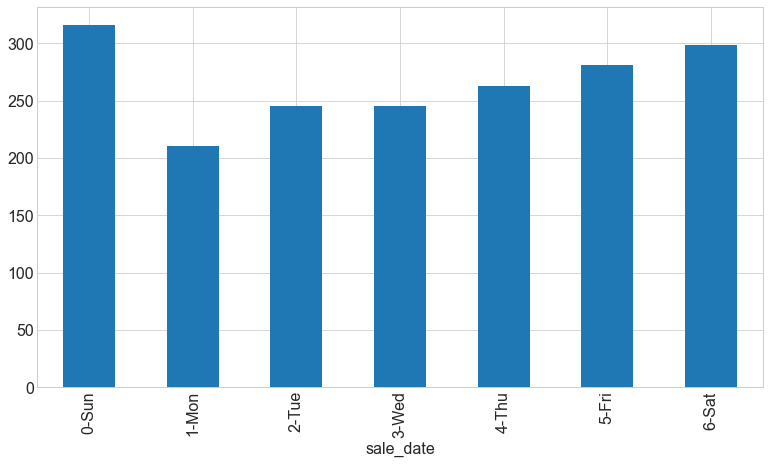

In [56]:
# showing how it is in order when the days are numbered
s.groupby(s.index.strftime('%w-%a')).mean().plot.bar()

Looks like there is a difference in sales by day

<AxesSubplot:xlabel='sale_date'>

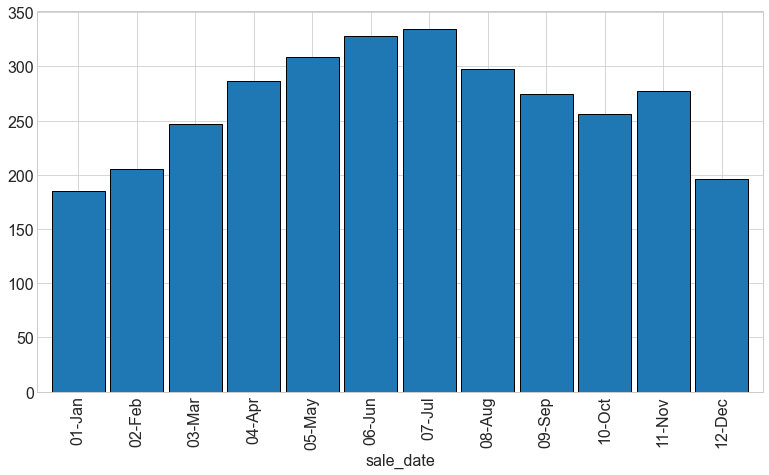

In [57]:
# showing how it's in order when you use the month number
s.groupby(s.index.strftime('%m-%b')).mean().plot.bar(width=.9, ec='black')

In [ ]:
QUESTION: HOW DO I REMOVE THE TIMESTAMP

In [58]:
# now let's move on the the rolling average
daily = s.resample('D').mean()
daily.rolling(30).mean().head(31)

sale_date
2013-01-01 00:00:00+00:00           NaN
2013-01-02 00:00:00+00:00           NaN
2013-01-03 00:00:00+00:00           NaN
2013-01-04 00:00:00+00:00           NaN
2013-01-05 00:00:00+00:00           NaN
2013-01-06 00:00:00+00:00           NaN
2013-01-07 00:00:00+00:00           NaN
2013-01-08 00:00:00+00:00           NaN
2013-01-09 00:00:00+00:00           NaN
2013-01-10 00:00:00+00:00           NaN
2013-01-11 00:00:00+00:00           NaN
2013-01-12 00:00:00+00:00           NaN
2013-01-13 00:00:00+00:00           NaN
2013-01-14 00:00:00+00:00           NaN
2013-01-15 00:00:00+00:00           NaN
2013-01-16 00:00:00+00:00           NaN
2013-01-17 00:00:00+00:00           NaN
2013-01-18 00:00:00+00:00           NaN
2013-01-19 00:00:00+00:00           NaN
2013-01-20 00:00:00+00:00           NaN
2013-01-21 00:00:00+00:00           NaN
2013-01-22 00:00:00+00:00           NaN
2013-01-23 00:00:00+00:00           NaN
2013-01-24 00:00:00+00:00           NaN
2013-01-25 00:00:00+00:00     

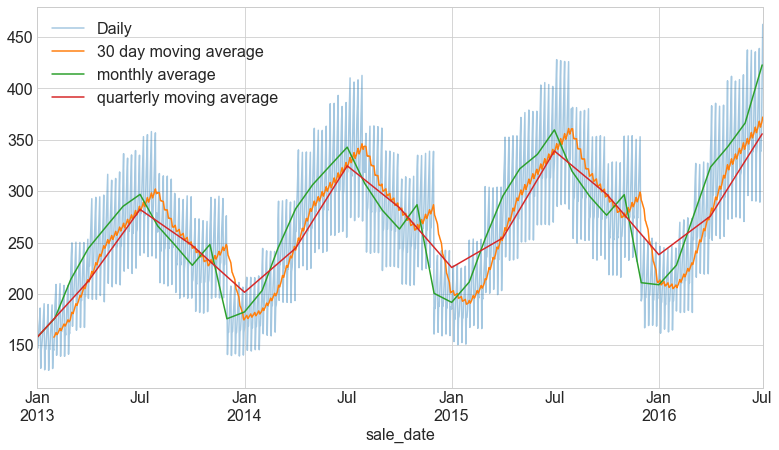

In [59]:
# let's plot the rolling average
ax = s.resample('D').mean().plot(label='Daily', alpha=.4)
s.resample('D').mean().rolling(30).mean().plot(ax=ax, label='30 day moving average')
s.resample('M').mean().plot(ax=ax, label='monthly average')
s.resample('3M').mean().rolling(1).mean().plot(ax=ax, label = 'quarterly moving average')
#s.sample('Y').mean().plot(ax=ax, label = 'Yearly')
ax.legend()

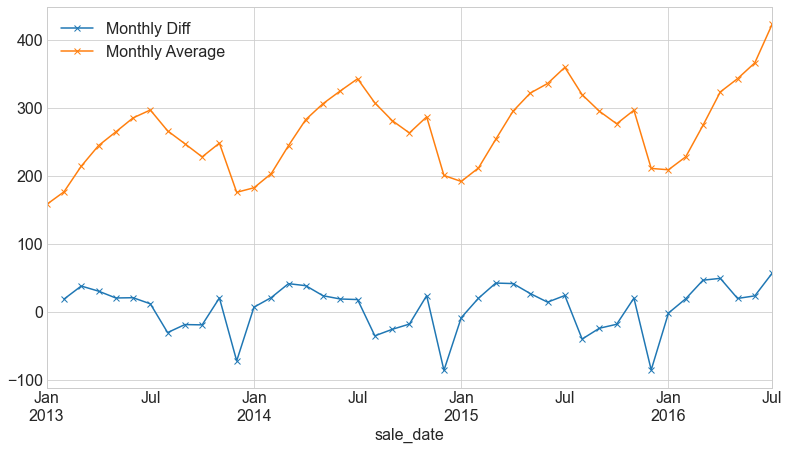

In [60]:
#Let's visualize the monthly change in temperature:
ax = s.resample('M').mean().diff().plot(label='Monthly Diff', marker='x')
s.resample('M').mean().plot(ax=ax, label='Monthly Average', marker='x')
plt.legend()

In [ ]:
QUESTION HOW DO I READ THIS WHAT DO THE SHORT LINES REPRESENT?

<AxesSubplot:xlabel='sale_date'>

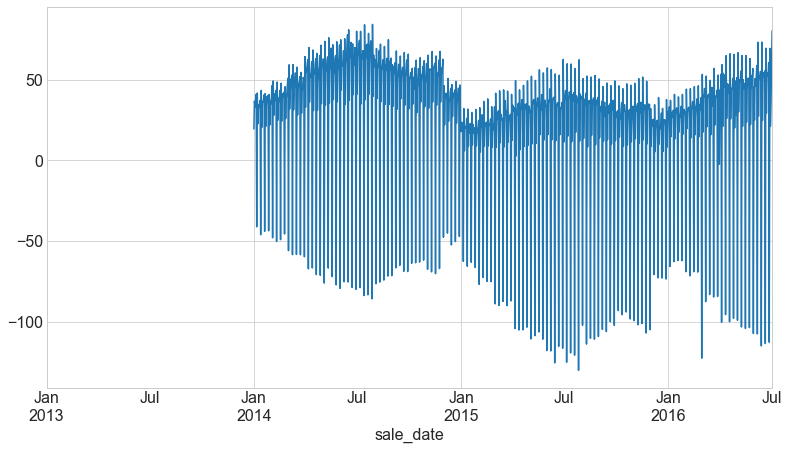

In [61]:
#We could visualize the difference in sales from each day in the previous year by resampling to the day 
#and using a diff of 365:
s.resample('D').mean().diff(365).plot()

# .shift

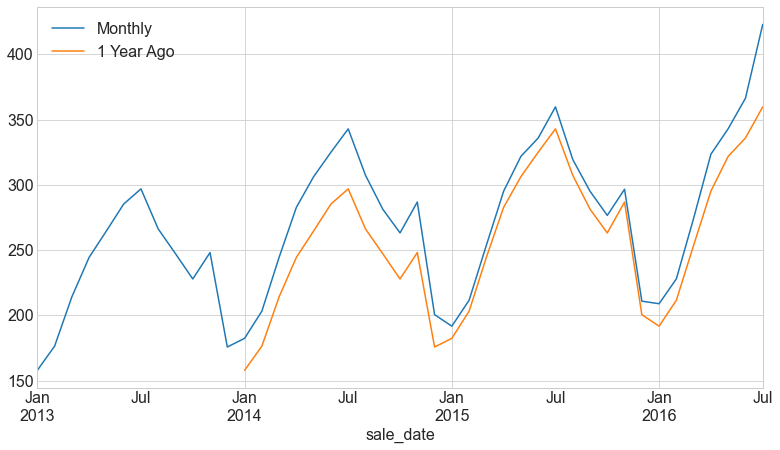

In [66]:
# this will let me see the months and the difference between the same month the year prior

ax = s.resample('M').mean().plot(label='Monthly')
s.resample('M').mean().shift(12).plot(label='1 Year Ago', ax=ax)
ax.legend()

<AxesSubplot:xlabel='sale_date'>

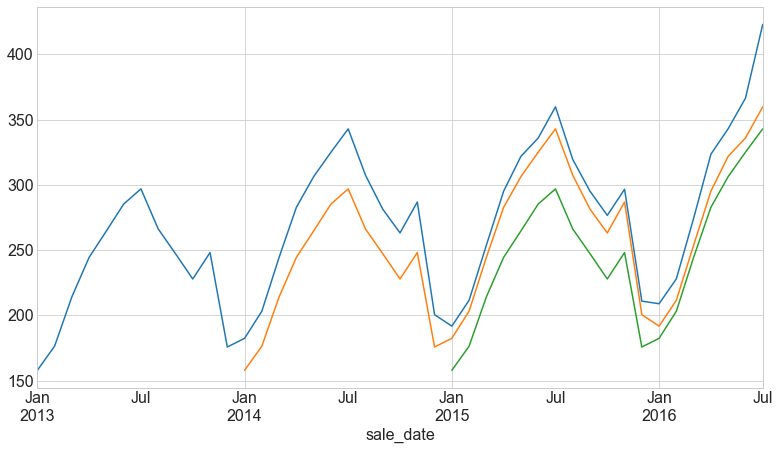

In [64]:
# now I am going to try to lay the month sales from 2 years ago on top of what we have here
ax = s.resample('M').mean().plot(label='Monthly')
s.resample('M').mean().shift(12).plot(label='1 Year Ago', ax=ax)
s.resample('M').mean().shift(24).plot(label= '2 Years Ago', ax=ax)

[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

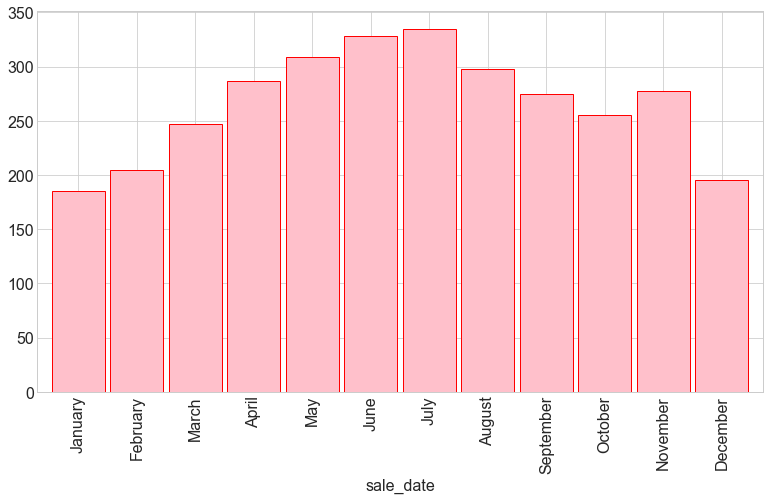

In [65]:
# Here we include the month number when grouping by month so that the months appear in the correct order 
ax = s.groupby(s.index.strftime('%m-%B')).mean().plot.bar(width=.9, ec='red', fc='pink')

# The next two lines basically "slice off" the number prefix of the month labels.
labels = ax.get_xticklabels()
ax.set_xticklabels([l.get_text()[3:] for l in labels])

# Seasonality

A lag plot is a scatter plot of the value at a time against the value at the same time time plus some value, k.

In [ ]:
# so we can plot the total sales from one day to the next and show the correlation there

<AxesSubplot:xlabel='t', ylabel='t + 1'>

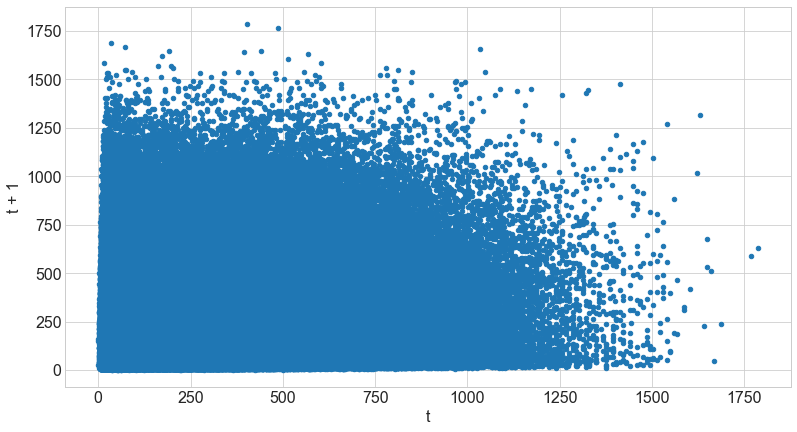

In [68]:
# We concatenate the series with itself shifted by 1 and then make a scatter plot of the two columns
pd.concat([s.rename('t'), s.shift().rename('t + 1')], axis=1).plot.scatter(y='t + 1', x='t')

Each point represents the sales total for one day on the x-axis, and the sales total for the next day on the y-axis.

In [ ]:
QUESTION HOW COULD I SEE THIS WITH LESS? SAMPLE SOMEWHERE OR DOES THIS JUST SHOW ME THERE IS NO CORRELATION?

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

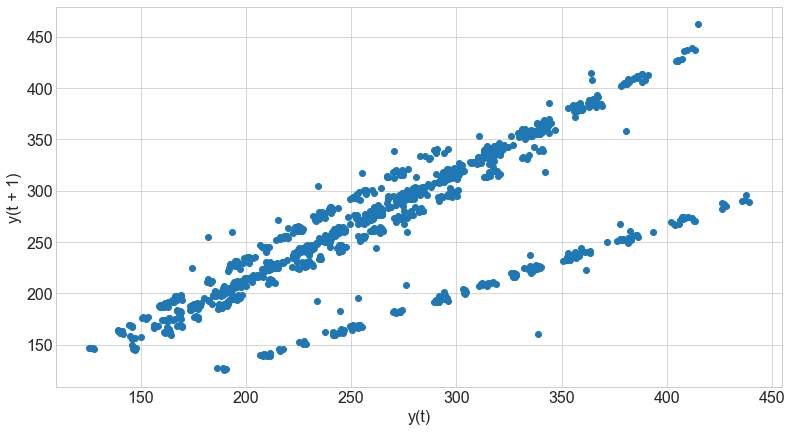

In [69]:
# this is how you use pandas built-in to make a lag_plot
pd.plotting.lag_plot(s.resample('D').mean(), 1)

In [78]:
autocorrelation(s.resample('D').mean(), 1)

0.7456808405747782

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

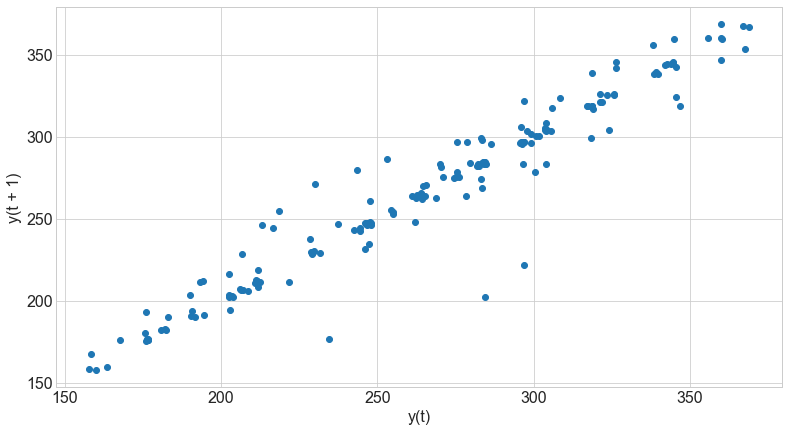

In [71]:
# how about from one week to the next
pd.plotting.lag_plot(s.resample('W').mean(), 1)

In [79]:
autocorrelation(s.resample('W').mean(), 1)

0.966342226529689

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

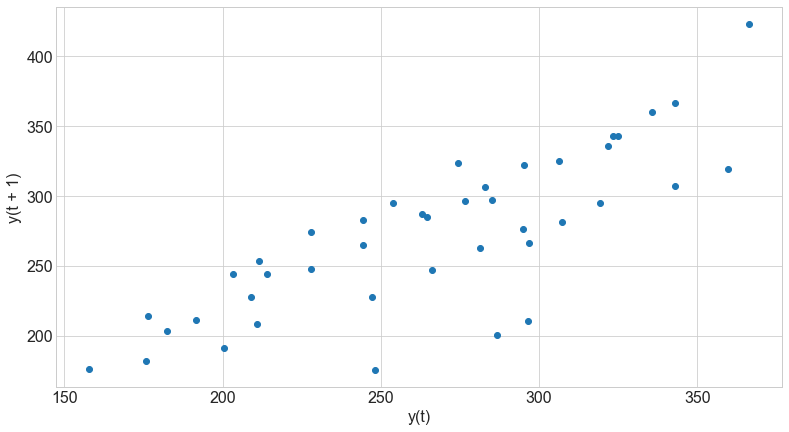

In [73]:
# how about a lag_plot from one month to the next
pd.plotting.lag_plot(s.resample('M').mean(),1)

In [80]:
autocorrelation(s.resample('M').mean(), 1)

0.8080371956076674

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

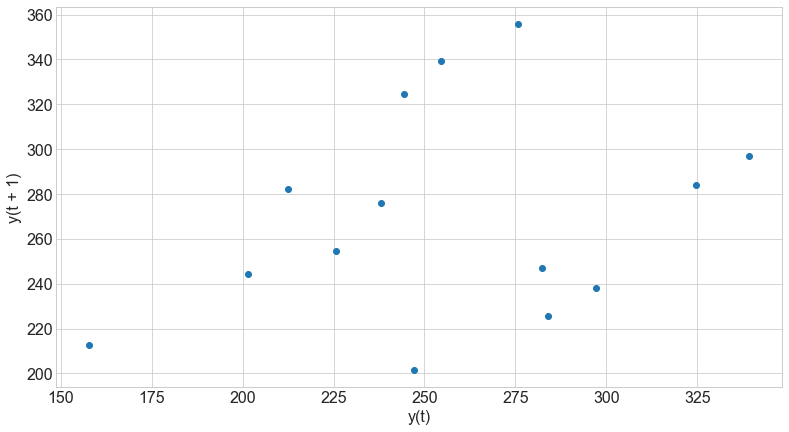

In [75]:
# how about from one quarter to the next
pd.plotting.lag_plot(s.resample('3M').mean(),1)

In [81]:
autocorrelation(s.resample('3M').mean(), 1)

0.2846895605489774

In [76]:
# we can use this function to find the correlation
def autocorrelation(s, lag):
    return pd.concat([s, s.shift(lag)], axis=1).dropna().corr().iloc[0, 1]

In [77]:
autocorrelation(s.resample('D').mean(), 1)

0.7456808405747782

In [82]:
# Here we construct a series with index being each number from 1 to 365, and the values being the
# autocorrelation for that value of lag
autocorr = pd.Series({lag: autocorrelation(s.resample('D').mean(), lag) for lag in range(1, 365)})
autocorr

1      0.745681
2      0.660279
3      0.575999
4      0.570979
5      0.645040
         ...   
360    0.531377
361    0.534641
362    0.621253
363    0.709075
364    0.976395
Length: 364, dtype: float64

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 182)'>

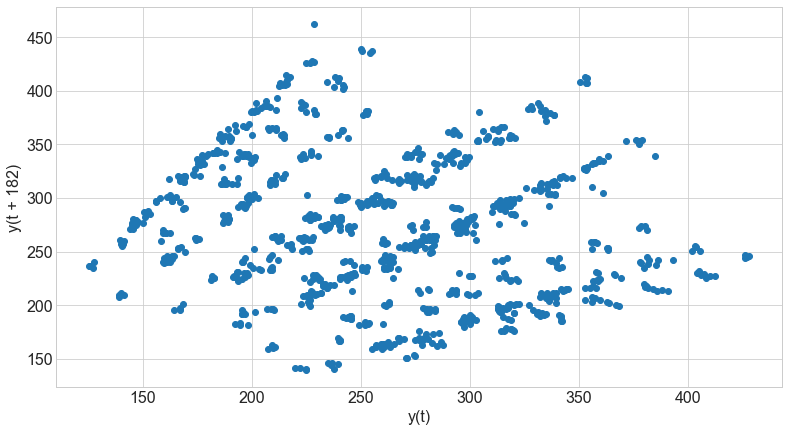

In [83]:
# so this allows us to plot from one day to half a year from that point
pd.plotting.lag_plot(s.resample('D').mean(), round(365 / 2))

<AxesSubplot:xlabel='lag period', ylabel='autocorrelation'>

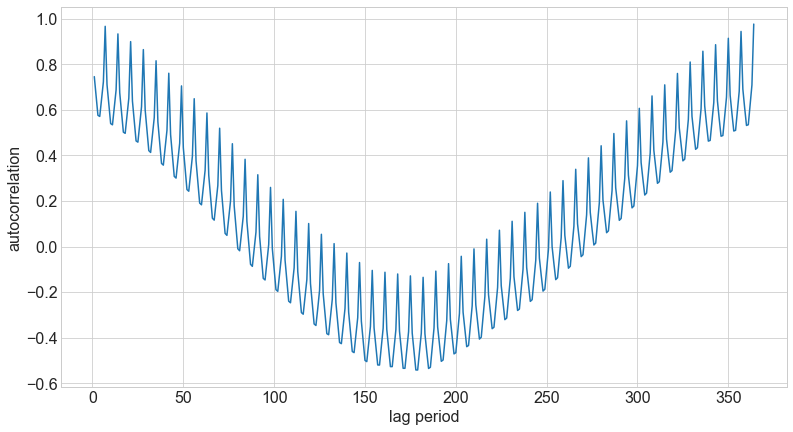

In [84]:
autocorr.plot(xlabel='lag period', ylabel='autocorrelation')

When lag is 10 cor is .59
when lag is 14 cor is .98 because it's the same day of the week here
when lag is 18 cor is .57
when lag is 21 cor is .96 it's the same day of the week here but 2 weeks later so a little less cor
when lag is 24 cor is .55

QUESTION WHAT IS DRIVING CORRELATION BACK UP FROM 175 LAG ON? IS IT BECAUSE IT GETTING CLOSE TO BEING THE SAME
DAY OF THE NEXT YEAR?

This is a common visualization to use to identify seasonality, and pandas has a built in plotting function for it as well:

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

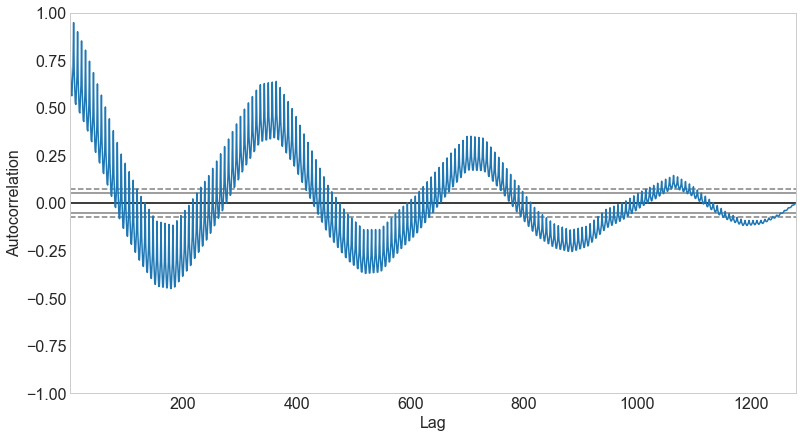

In [85]:
pd.plotting.autocorrelation_plot(s.resample('D').mean())

In [ ]:
This tells me there is seasonality but corr is lost as the yeas go by like when nearing the 4 year point it
follows the pattern less

# Trend

<AxesSubplot:xlabel='Date'>

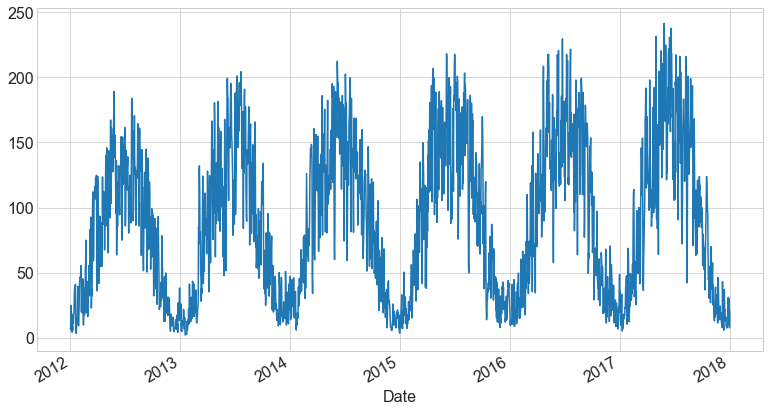

In [88]:
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url, index_col='Date', parse_dates=True)
s = df.Solar.dropna()
s.plot()

<AxesSubplot:xlabel='Date'>

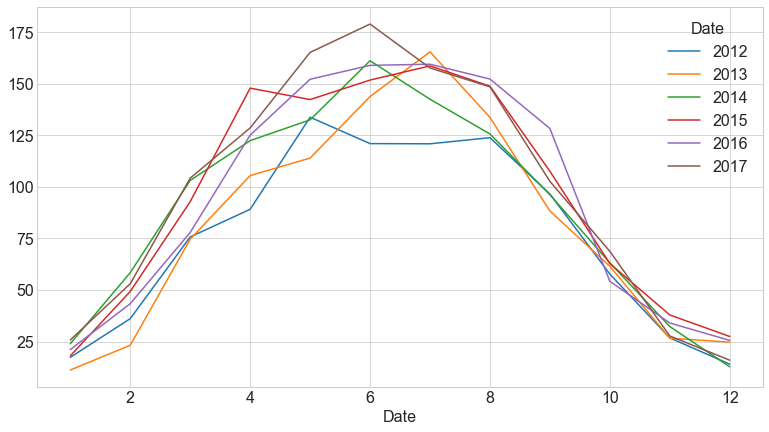

In [89]:
# a seasonal plot shows each year as a seperate line
s.groupby([s.index.year, s.index.month]).mean().unstack(0).plot()

In [ ]:
# we can see each years peak period for sales is increasing since 2012 maybe due to vacations and kids
# out of school so more travel and thus spending

A seasonal subseries plot shows the year-over-year trend within each month:

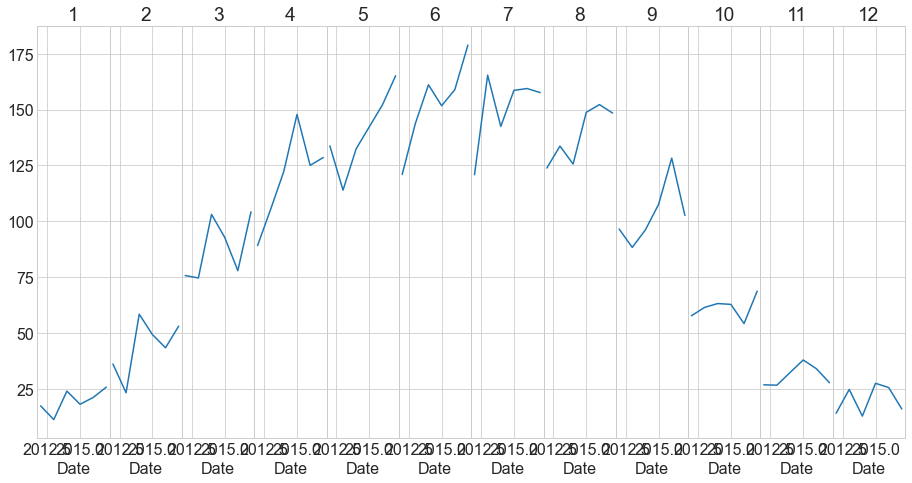

In [90]:
fig, axs = plt.subplots(1, 12, sharex=True, sharey=True)
for ax, (month, x) in zip(axs, s.groupby([s.index.year, s.index.month]).mean().unstack().iteritems()):
    x.plot(ax=ax, title=month)
fig.tight_layout()
fig.subplots_adjust(wspace=0)

# Seasonal Decomposition

In [93]:
s = s.resample('W').mean()

In [94]:
import statsmodels.api as sm

# using statsmodels
result = sm.tsa.seasonal_decompose(s, model='additive')
result = pd.DataFrame(dict(
    observed=result.observed,
    residual=result.resid,
    seasonal=result.seasonal,
    trend=result.trend
))

In [95]:
result.head(30)

,observed,residual,seasonal,trend
Date,,,,
2012-01-01,6.587000,NaN,-67.865665,NaN
2012-01-08,10.960000,NaN,-69.895039,NaN
2012-01-15,19.160286,NaN,-70.796349,NaN
2012-01-22,20.390429,NaN,-74.712380,NaN
2012-01-29,17.706000,NaN,-73.824348,NaN
2012-02-05,41.160000,NaN,-60.935704,NaN
2012-02-12,36.558000,NaN,-57.714654,NaN
2012-02-19,21.701143,NaN,-52.170986,NaN
2012-02-26,44.967286,NaN,-40.051952,NaN


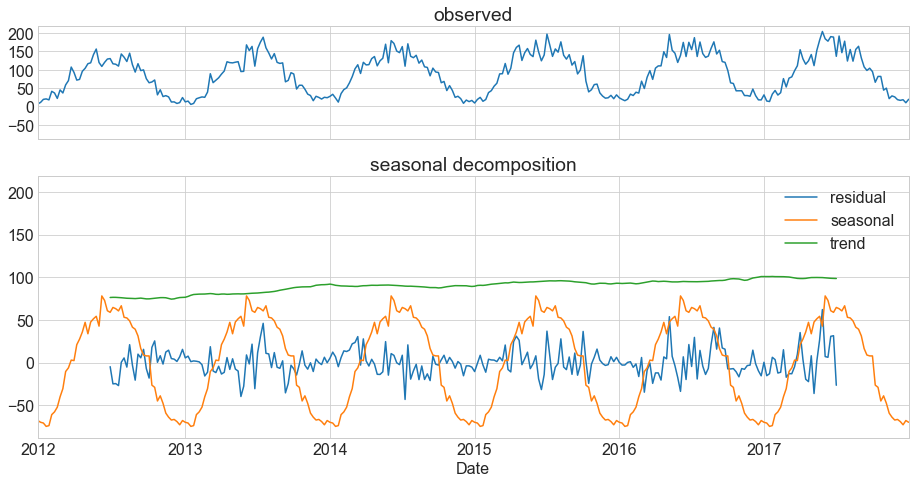

In [96]:
gs = plt.GridSpec(3, 1)
fig = plt.figure()
ax1 = fig.add_subplot(gs[1:])
ax2 = fig.add_subplot(gs[0], sharex=ax1, sharey=ax1)
result.iloc[:, 1:].plot(ax=ax1, title='seasonal decomposition')
result.observed.plot(ax=ax2, title='observed')
fig.tight_layout()

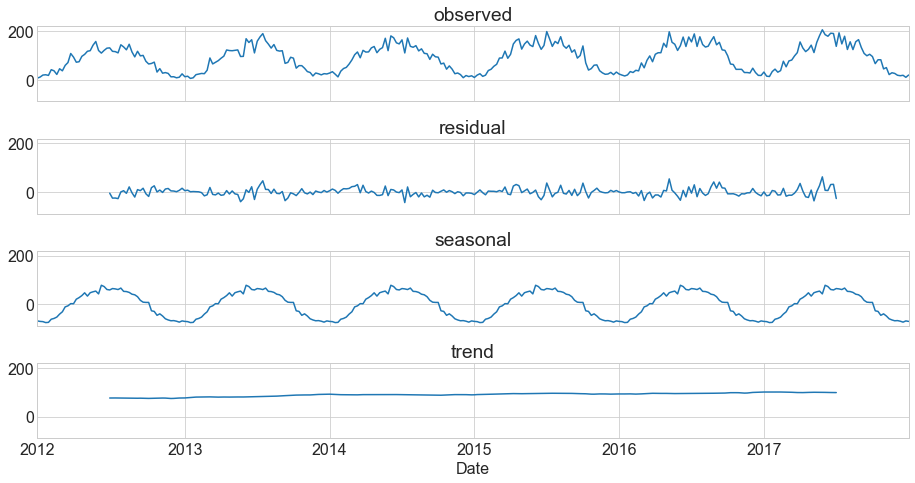

In [97]:
fig, axs = plt.subplots(4, 1, sharex=True, sharey=True)
for ax, (col, x) in zip(axs, result.iteritems()):
    x.plot(ax=ax, title=col)
fig.tight_layout()